# Final Project - end to end ML project 

### Team Members:
    Katia Sory 260927168

#### Motivation for this project: 

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas_profiling
from sklearn.impute import  SimpleImputer
from sklearn.metrics import mean_squared_error
from scipy import stats
import pandas as pd
import numpy as np
import os

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import (
    ensemble,
    model_selection,
    preprocessing,
    tree
)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)


In [40]:
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

font = {'family' : 'Optima',
        'weight' : 'regular',
        'size'   : 16}
plt.rc('font', **font)
plt.rc('xtick', labelsize=15)     # tick labels bigger
plt.rc('ytick', labelsize=15)     # tick labels bigger
plt.rc('savefig', dpi=300)       # higher res outputs

# Load dataset into the DataFrame

In [114]:
df = pd.read_excel(r"C:\Users\Katia\Downloads\Final_Project_dataset_V2.xlsx")
data = pd.read_excel(r"C:\Users\Katia\Downloads\Final_Project_dataset_V2.xlsx")

## Check the types

In [55]:
df.dtypes

Case no.                                                 int64
Date of notification to WHO (yyyy/mm/dd)        datetime64[ns]
Reporting country                                       object
City of residence                                       object
Age                                                      int64
Sex                                                     object
Health care worker                                      object
Comorbidities                                           object
Exposure to camels                                      object
Camel milk consumption                                  object
Exposure to MERS-CoV cases                              object
Date of symptoms onset (yyyy/mm/dd)                     object
Date of first hospitalization (yyyy/mm/dd)              object
Date of laboratory confirmation (yyyy/mm/dd)    datetime64[ns]
Day_diff                                               float64
Status                                                 

# Data Exploration

### DESCRIBING BASIC STATS RELATED TO THE DATA PRESENT

In [56]:
df.describe()

,Case no.,Age,Day_diff
count,2439.000000,2439.000000,1739.000000
mean,11.106191,50.851989,5.566417
std,15.600892,17.641605,3.262145
min,1.000000,10.000000,1.000000
25%,4.000000,36.000000,3.000000
50%,8.000000,52.000000,5.000000
75%,14.000000,63.000000,8.000000
max,208.000000,90.000000,20.000000


### Fetching top 5 values in the dataset

In [57]:
df.head()

,Case no.,Date of notification to WHO (yyyy/mm/dd),Reporting country,City of residence,Age,Sex,Health care worker,Comorbidities,Exposure to camels,Camel milk consumption,Exposure to MERS-CoV cases,Date of symptoms onset (yyyy/mm/dd),Date of first hospitalization (yyyy/mm/dd),Date of laboratory confirmation (yyyy/mm/dd),Day_diff,Status
0,1,2017-08-15,Saudi Arabia,Madinah,67,M,No,Yes,Yes,No,No,2017-08-12 00:00:00,2017-08-14 00:00:00,2017-08-14,2.0,Alive
1,2,2017-08-16,Saudi Arabia,Jeddah,69,M,No,Yes,No,No,No,2017-08-13 00:00:00,2017-08-15 00:00:00,2017-08-15,2.0,Alive
2,3,2017-08-18,Saudi Arabia,Jeddah,51,M,No,Yes,No,No,No,2017-08-11 00:00:00,2017-08-17 00:00:00,2017-08-17,6.0,Alive
3,4,2017-08-21,Saudi Arabia,Riyadh,48,M,No,Yes,Yes,Yes,No,2017-08-18 00:00:00,2017-08-20 00:00:00,2017-08-20,2.0,Alive
4,5,2017-08-24,Saudi Arabia,Dawmet Aljandal,40,F,No,Yes,No,No,No,2017-08-17 00:00:00,2017-08-21 00:00:00,2017-08-22,5.0,Alive


# Dealing with missing values

In [16]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [17]:
# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Date_of_first_hospitalization_(yyyy/mm/dd),786,32.2
Day_diff,700,28.7
Date_of_symptoms_onset_(yyyy/mm/dd),694,28.5
Date_of_laboratory_confirmation_(yyyy/mm/dd),12,0.5


## Visualize missing values

In [19]:
! pip install missingno

### Nullity Matrix

The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

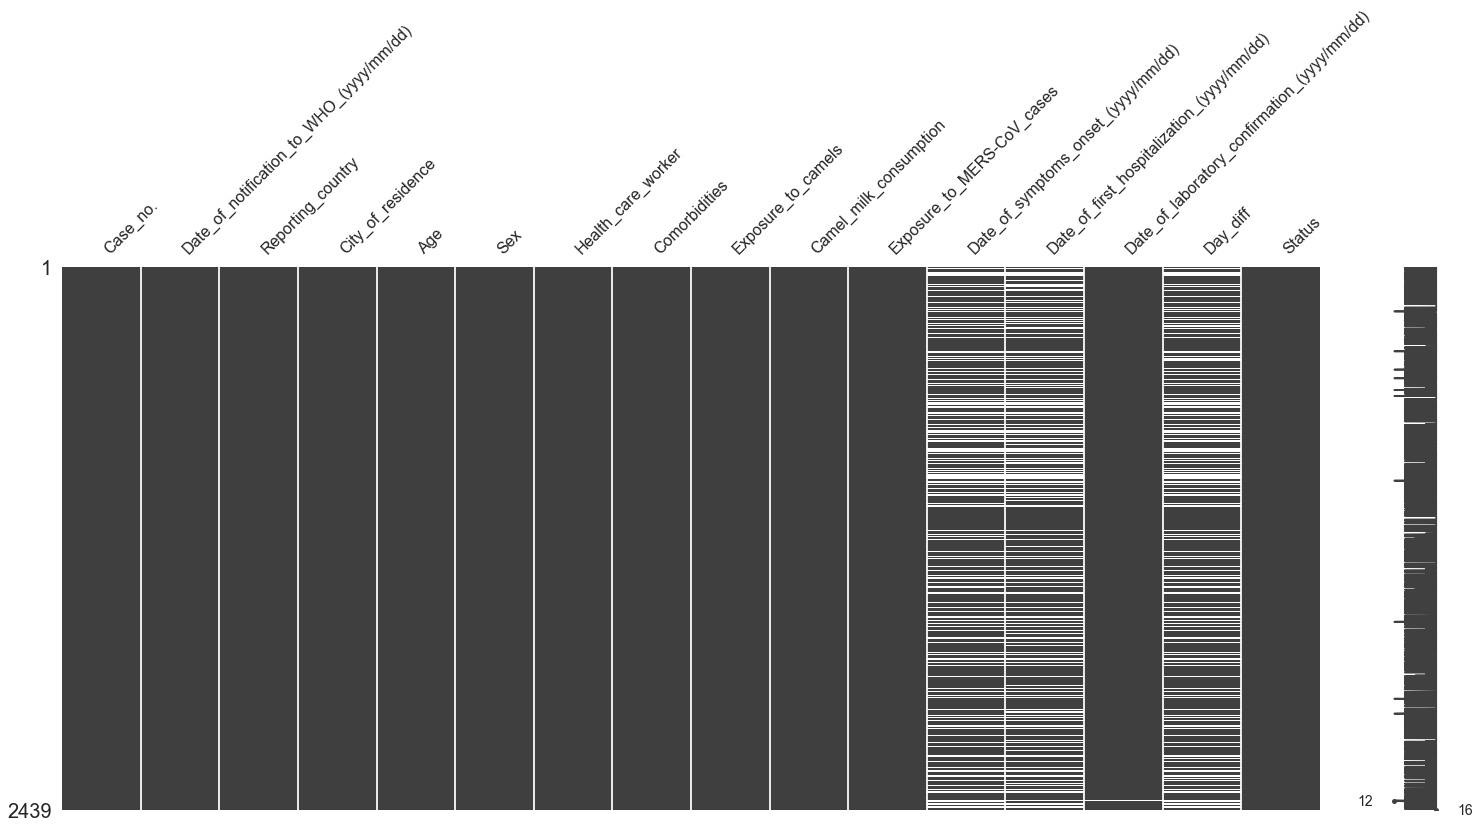

In [25]:
import missingno as msno
ax = msno.matrix(df.sample(2439))

### Missingno correlation heatmap

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another

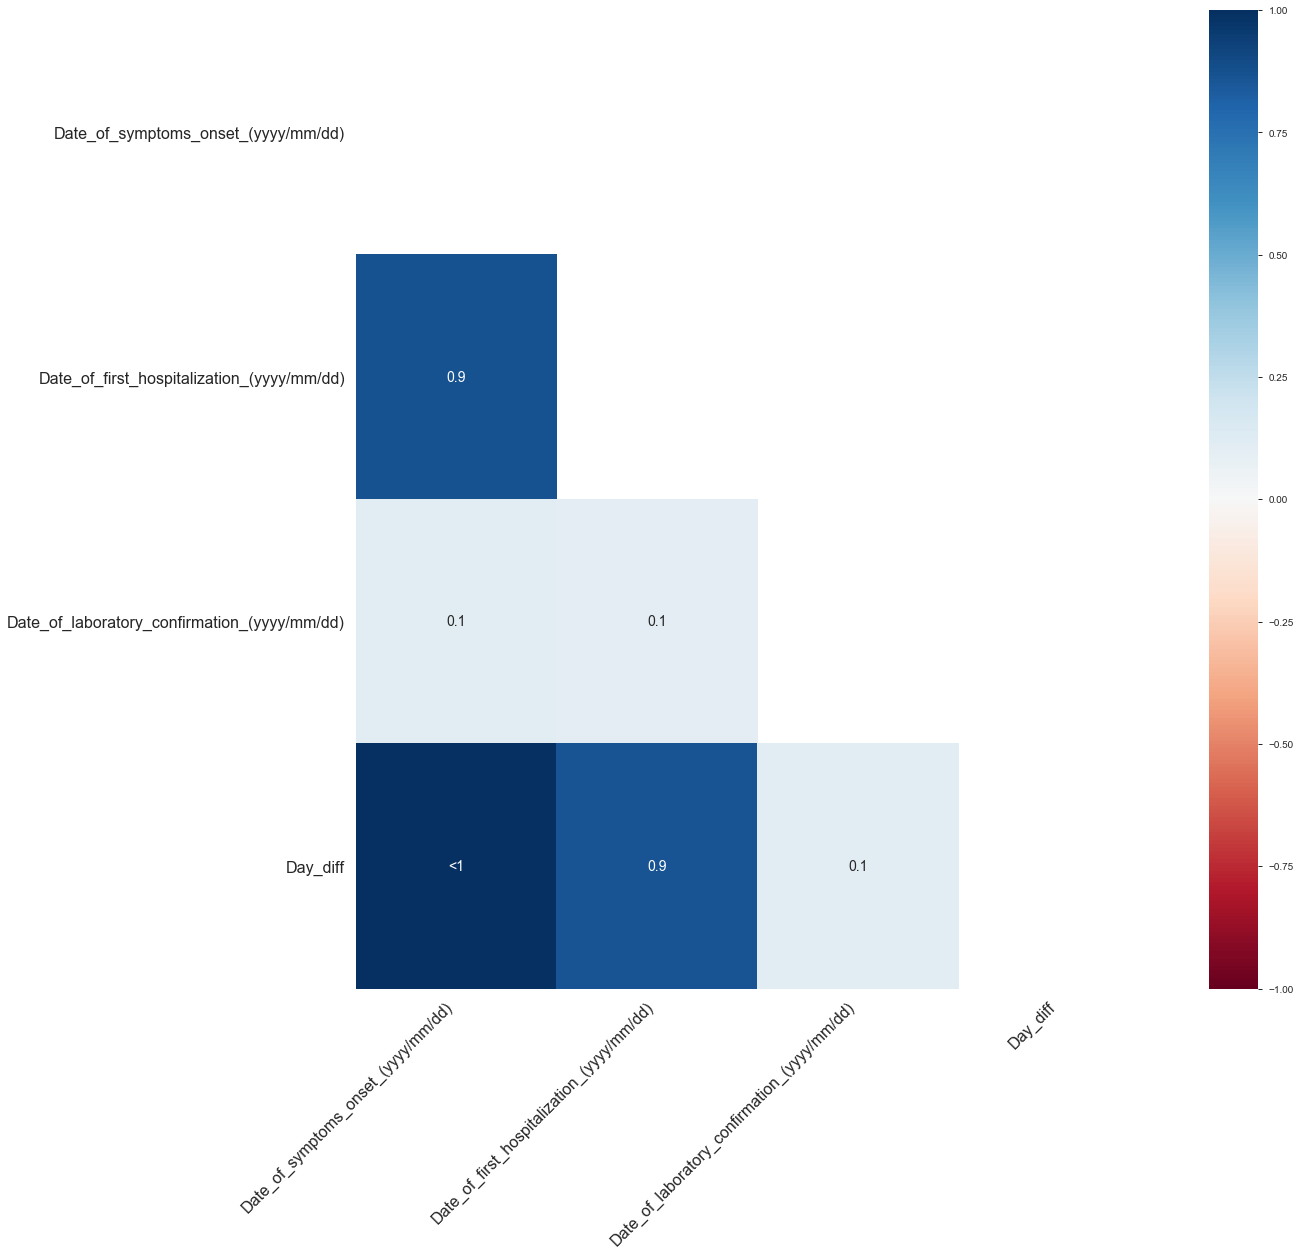

In [27]:
ax = msno.heatmap(df, figsize=(18, 18))

### Dendogram
The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap

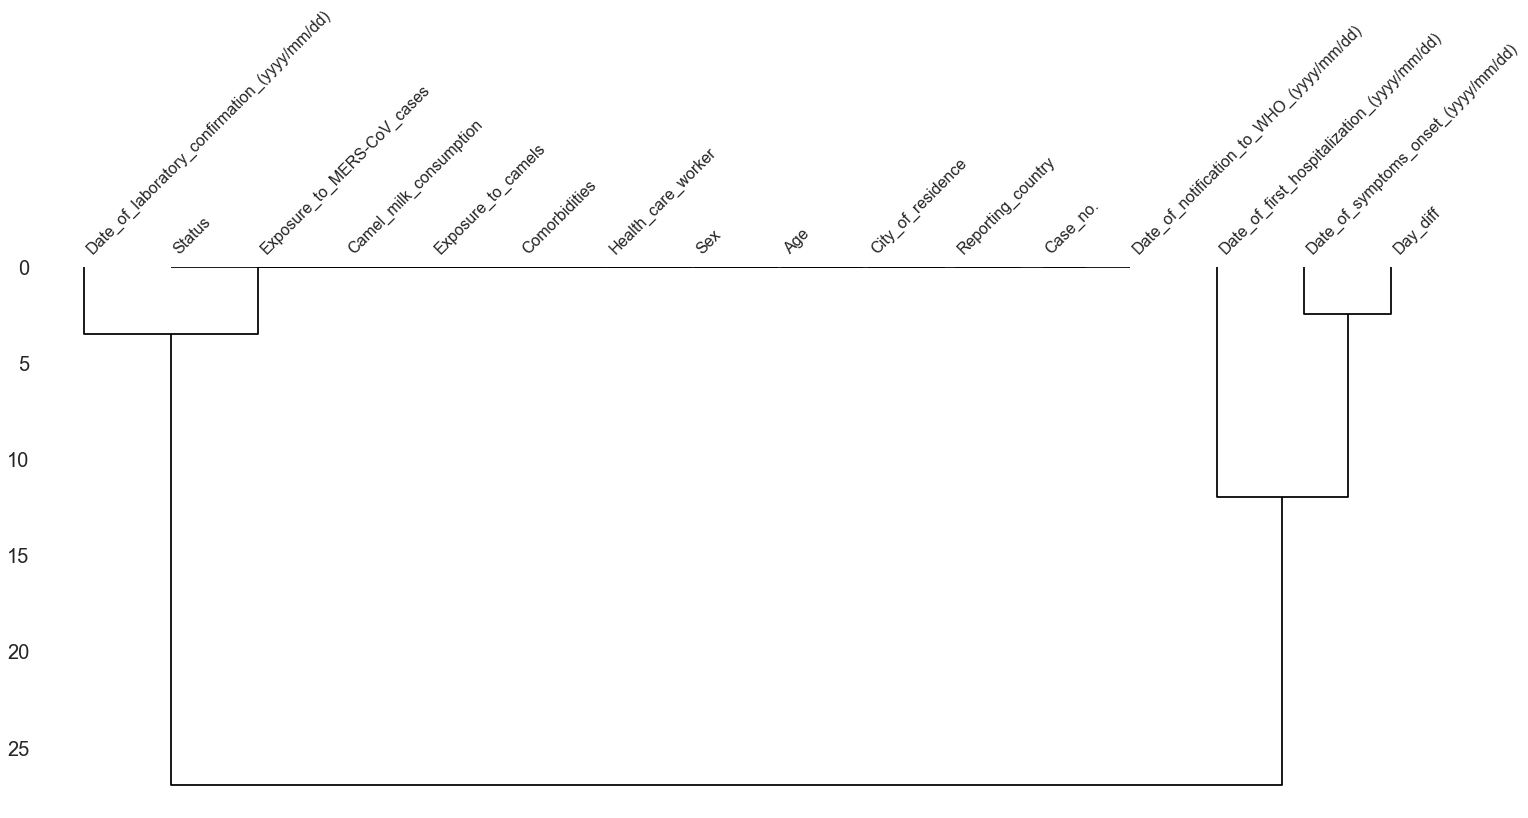

In [28]:
ax = msno.dendrogram(df)

## Create the target

If the patient's status is deceased, it is 0 otherwise the patient's status is alive or 1.

In [128]:
target = [
    1 if i == 'Alive'  else 0
    for i in df['Status']
]

df['target'] = target
df['target'].value_counts()

1    1782
0     657
Name: target, dtype: int64

## Correlations
Check top 10 positive and negative correlations

In [66]:
corr = df.corr()['target'].sort_values()

# Display correlations
print('Top 10 - Positive Correlations:')
print('-----------------------------------')
print(corr.tail(10))
print('\nTop 10 - Negative Correlations:')
print('------------------------------')
print(corr.head(10))

Top 10 - Positive Correlations:
-----------------------------------
Age        -0.292131
Day_diff   -0.088554
Case no.    0.086325
target      1.000000
Name: target, dtype: float64

Top 10 - Negative Correlations:
------------------------------
Age        -0.292131
Day_diff   -0.088554
Case no.    0.086325
target      1.000000
Name: target, dtype: float64


[Text(0.5, 0, 'Case no.'),
 Text(1.5, 0, 'Age'),
 Text(2.5, 0, 'Day_diff'),
 Text(3.5, 0, 'target')]

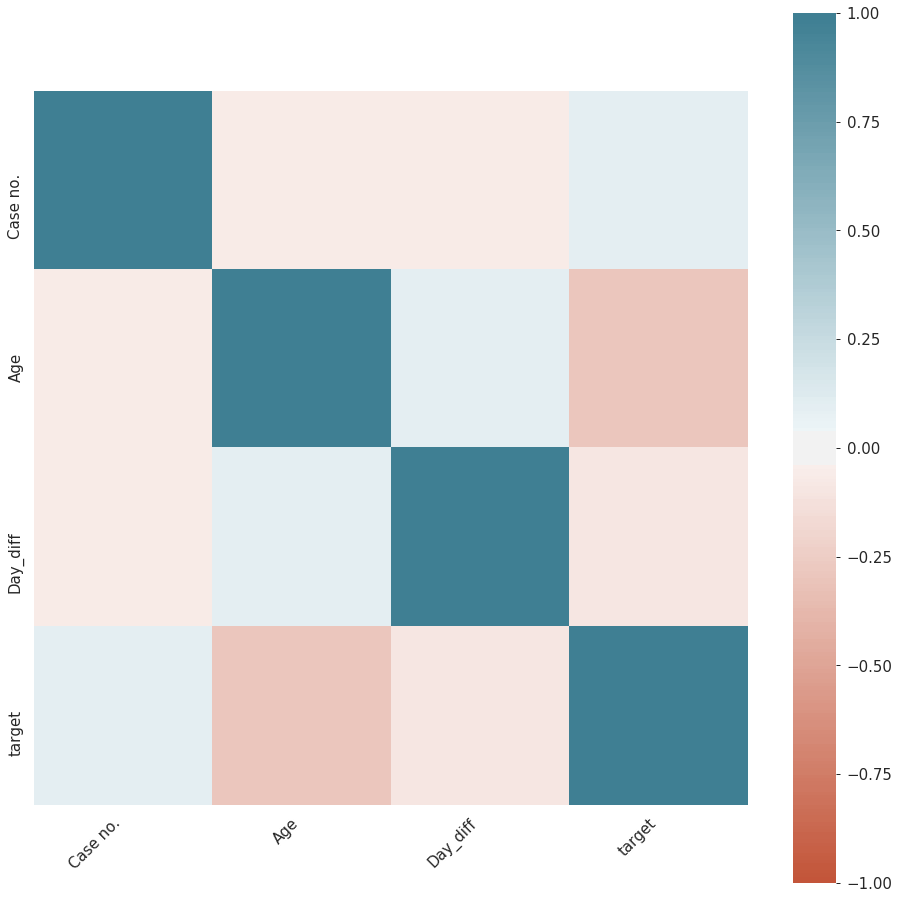

In [67]:
correlation = df.corr()
plt.figure(figsize=(16, 16))
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

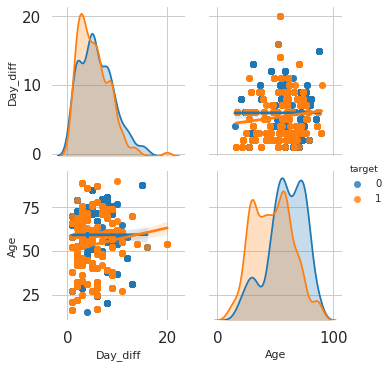

In [68]:
from seaborn import pairplot
new_df = df.copy()
vars = ["Day_diff", "Age"]
p = pairplot(
    new_df, vars=vars, hue="target", kind="reg"
)

## Distribution of age for alive and deceased people 

Text(0.5, 1.0, 'Distribution of Age')

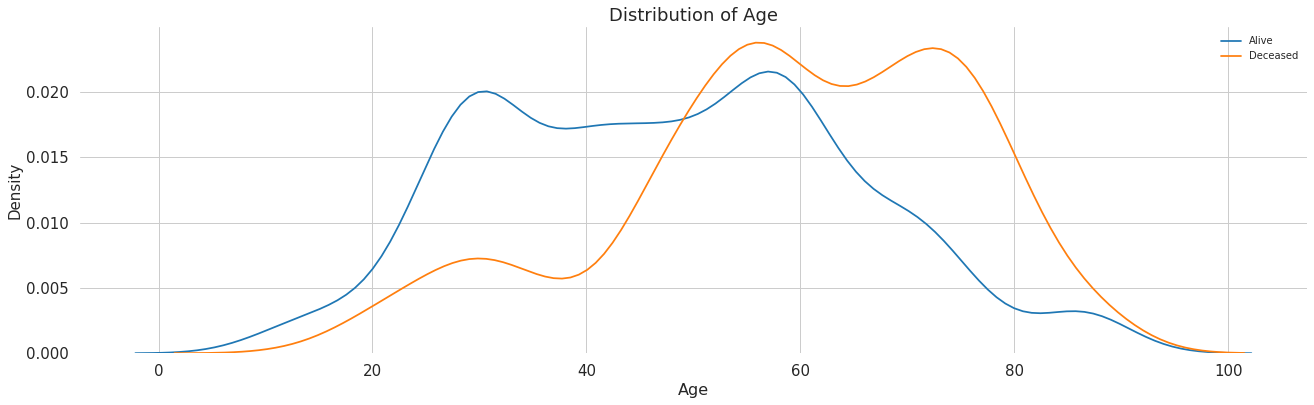

In [131]:
fig = plt.figure(figsize=(22, 6))
sns.kdeplot(df.loc[df['target'] == 1, 'Age'], label='Alive')
sns.kdeplot(df.loc[df['target'] == 0, 'Age'], label='Deceased')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Density', fontsize=15)
plt.title('Distribution of Age', fontsize=18)

## Places

In [98]:
Places = [
    1 if i == 'Saudi Arabia'  else 2
    for i in df['Reporting country']
]

df['Places'] = Places
df['Places'].value_counts()

1    2318
2     121
Name: Places, dtype: int64

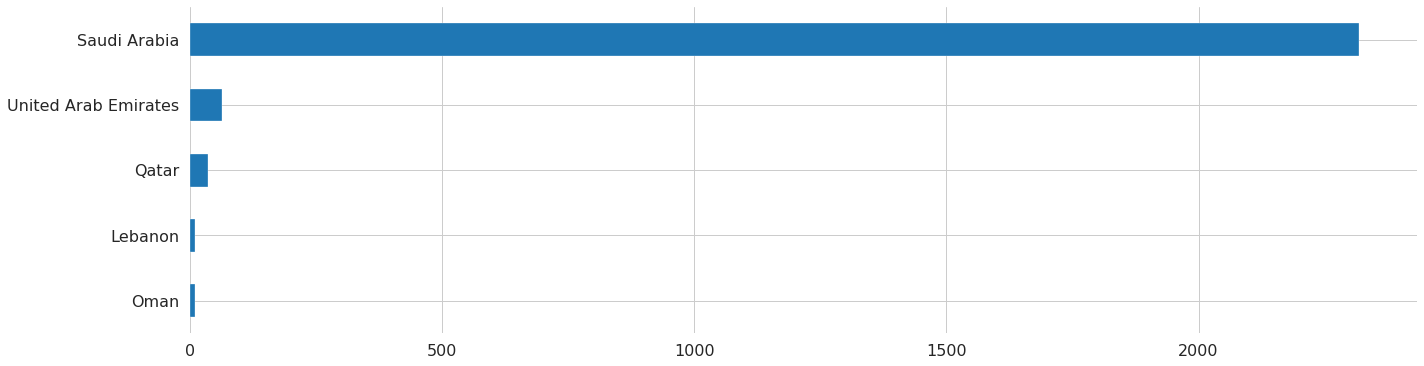

In [81]:
df["Reporting country"].value_counts().sort_values().plot(kind='barh',
                                                   figsize=(22, 6),
                                                   fontsize=16)

Text(0.5, 1.0, 'Distribution of places')

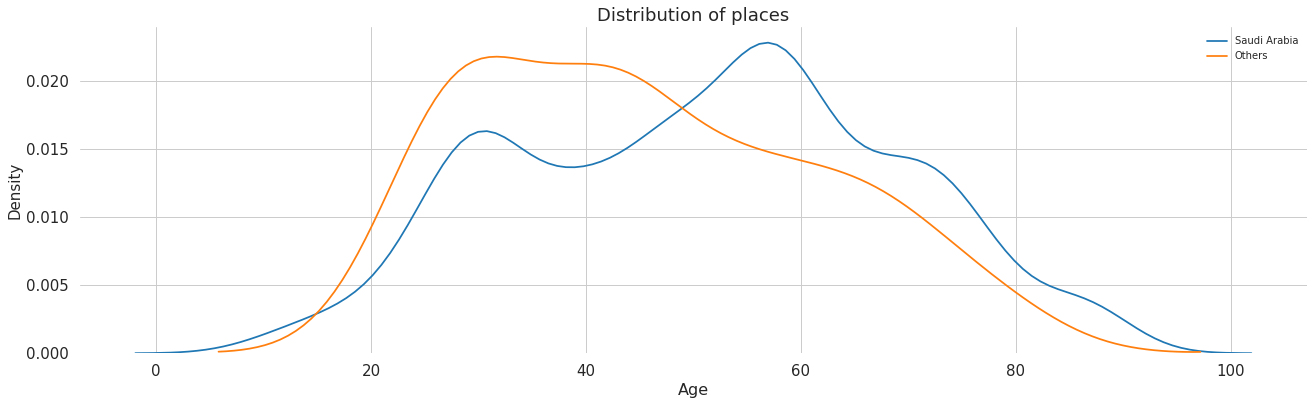

In [82]:
fig = plt.figure(figsize=(22, 6))
sns.kdeplot(df.loc[df['Places'] == 1, 'Age'], label='Saudi Arabia')
sns.kdeplot(df.loc[df['Places'] == 2, 'Age'], label='Others')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Density', fontsize=15)
plt.title('Distribution of places', fontsize=18)

## Gender

In [96]:
Gender = [
    1 if i == 'F'  else 0
    for i in df['Sex']
]

df['Gender'] = Gender
df['Gender'].value_counts()

0    1731
1     708
Name: Gender, dtype: int64

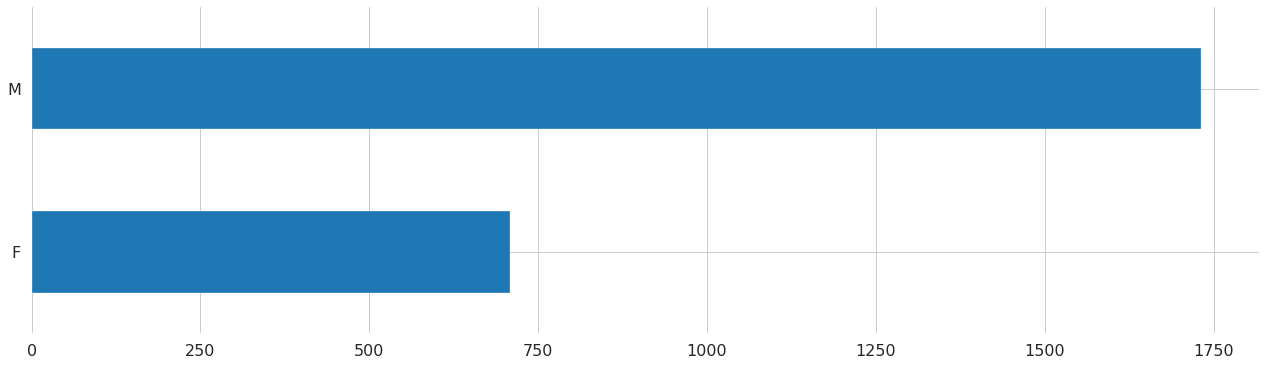

In [104]:
df["Sex"].value_counts().sort_values().plot(kind='barh',
                                                   figsize=(22, 6),
                                                   fontsize=16)

Text(0.5, 1.0, 'Distribution of days')

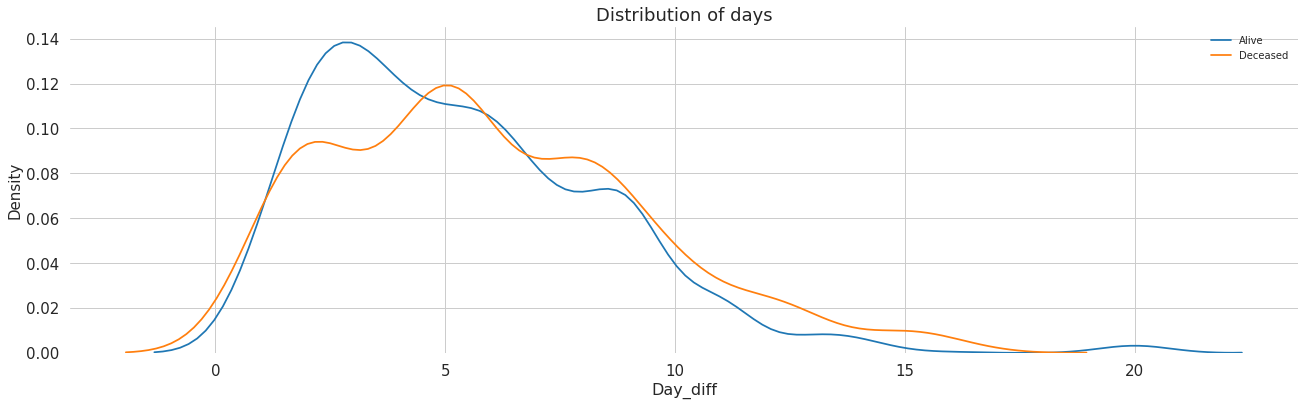

In [132]:
fig = plt.figure(figsize=(22, 6))
sns.kdeplot(df.loc[df['target'] == 1, 'Day_diff'], label='Alive')
sns.kdeplot(df.loc[df['target'] == 0, 'Day_diff'], label='Deceased')
plt.xlabel('Day_diff', fontsize=16)
plt.ylabel('Density', fontsize=15)
plt.title('Distribution of days', fontsize=18)

We might need to balance our data

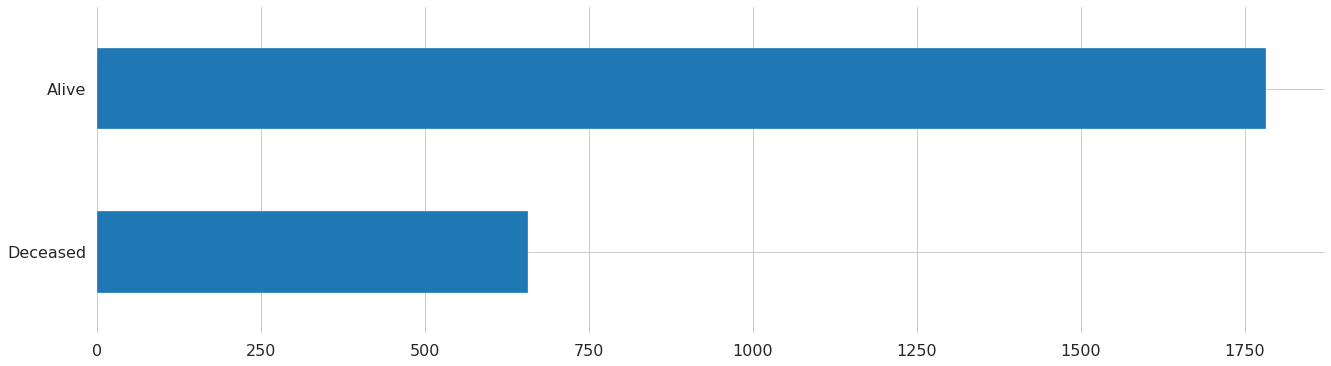

In [111]:
df["Status"].value_counts().sort_values().plot(kind='barh',
                                                   figsize=(22, 6),
                                                   fontsize=16)

# Data Preparation

## Categorical Encodings

In [116]:
from sklearn import preprocessing

count = 0

for col in df:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le = preprocessing.LabelEncoder()
            data[col] = le.fit_transform(data[col])
            count += 1
            print(col)

print('%d columns were label encoded.' % count)

Sex
Health care worker
Exposure to camels
Camel milk consumption
Exposure to MERS-CoV cases
Status
6 columns were label encoded.


### One-hot encoding the rest of categorical columns

In [117]:
data = pd.get_dummies(data)
print(data.shape)

(2439, 364)


In [122]:
data.head()

,Case no.,Date of notification to WHO (yyyy/mm/dd),Age,Sex,Health care worker,Exposure to camels,Camel milk consumption,Exposure to MERS-CoV cases,Date of laboratory confirmation (yyyy/mm/dd),Day_diff,Status,Reporting country_Lebanon,Reporting country_Oman,Reporting country_Qatar,Reporting country_Saudi Arabia,Reporting country_United Arab Emirates,City of residence_Abu Dhabi,City of residence_Afif,City of residence_Al Ain,City of residence_Al Musanaa Batinah,City of residence_Alasyah,City of residence_Albukiriah,City of residence_Aldalam,City of residence_Alhaisu,City of residence_Alkharj,City of residence_Alkhurmah,City of residence_Almithnab,City of residence_Almkhwah,City of residence_Alnemas,City of residence_Aloula,City of residence_Alqararh,City of residence_Alzulfi,City of residence_Bader,City of residence_Baha,City of residence_Baljurashi,City of residence_Beqiq,City of residence_Bisha,City of residence_Bishah,City of residence_Bukiriah,City of residence_Buraidah,City of residence_Buridah,City of residence_Buridah,City of residence_Dammam,City of residence_Dawmet Aljandal,City of residence_Doha,City of residence_Hafar Al-Batin,City of residence_Hafer Albatin,City of residence_Hail,City of residence_Hail City,City of residence_Hemma Region*,City of residence_Hofouf,City of residence_Hofuf,City of residence_Hofuf City,City of residence_Jeddah,City of residence_Jubail,City of residence_Khamis Mushait,City of residence_Khyber,City of residence_Madinah,City of residence_Madinah,City of residence_Mahayl,City of residence_Mahayl Assir,City of residence_Makkah,City of residence_Najran,City of residence_Qunfuthah,City of residence_Riaydh,City of residence_Riyadh,City of residence_Riyadh‡,City of residence_Sharqiyah,City of residence_Tabuk,City of residence_Taif,City of residence_Thadiq,City of residence_Thadiq City,City of residence_Turbah,City of residence_Unizah,City of residence_Uryirah,City of residence_Wadi Aldwaser,City of residence_Yanbu,City of residence_Yanbu City,City of residence_Zulfi,Comorbidities_NR,Comorbidities_No,Comorbidities_Yes,Date of symptoms onset (yyyy/mm/dd)_2016-12-19 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2016-12-23 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2016-12-25 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2016-12-26 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2016-12-28 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2016-12-29 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-01-03 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-01-04 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-01-07 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-01-08 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-01-11 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-01-12 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-01-15 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-01-18 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-01-20 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-01-21 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-01-23 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-01-24 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-01-28 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-01-30 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-02-01 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-02-03 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-02-04 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-02-08 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-02-09 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-02-12 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-02-14 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-02-18 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-02-19 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-02-20 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-02-21 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-02-26 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-02-28 00:00:00,Date of symptoms onset (yyyy/mm/dd)_2017-03-03 00:00:00,Date of symp